In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [8]:
starter = pd.read_csv('./datasets/train_nonulls.csv')

In [9]:
starter['Overall Qual_obj'] = starter['Overall Qual'].astype(object)
starter['Overall Cond_obj'] = starter['Overall Cond'].astype(object)
starter['MS_obj'] = starter['MS SubClass'].astype(object)

In [10]:
categorical = starter.select_dtypes(include=['object','bool'])
numerical = starter.select_dtypes(include=['float64','int'])

In [11]:
numerical_cols = pd.DataFrame((numerical.corr().abs()>.09)['SalePrice'].sort_values(ascending=False))
numerical_cols_toplot = numerical_cols.loc[numerical_cols['SalePrice'] == True].index.tolist()

In [12]:
cols1 = numerical_cols_toplot[1:10]
cols2 = numerical_cols_toplot[10:19]
cols3 = numerical_cols_toplot[19:30]

cols1.append('SalePrice')
cols2.append('SalePrice')
cols3.append('SalePrice')

Plot the First Nine Numerical Columns With the Highest Correlation to Sale Price.

Code inspired from: [https://stackoverflow.com/questions/41329789/populating-seaborn-subplots-using-an-array](https://stackoverflow.com/questions/41329789/populating-seaborn-subplots-using-an-array)


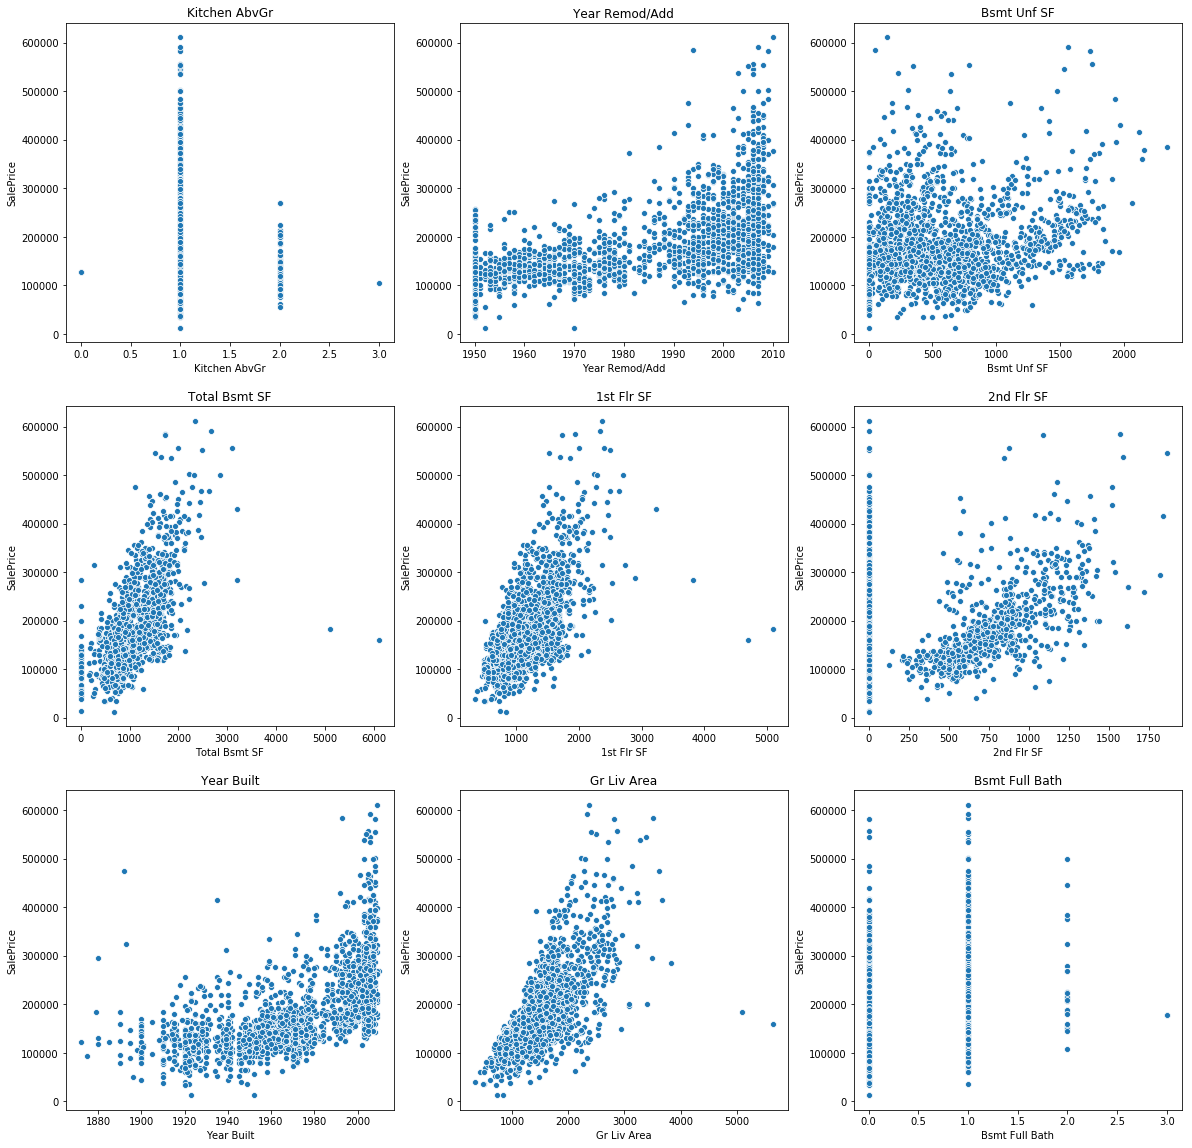

In [13]:
# create function that will return a list of items
# this particular example returns just a list of one element
def buckets(i):
    return cols1[i]

# load dataset and create figure
num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

for i in range(num_plots):
    df = starter[cols1]
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.scatterplot(x=cols1[i], y="SalePrice", data=df, ax=ax_curr)
    ax_curr.set_title(buckets(i))

Total Basement SF, 1st Floor SF and Gr Liv Area have very similar looking plots. Year Built interestingly seems to favor newer homes even more than Newly Remodeled.

Two kitchens "AbvGround" also seems to be worse than one, which is counter intuitive.

### Plotting the next 9 numerical values

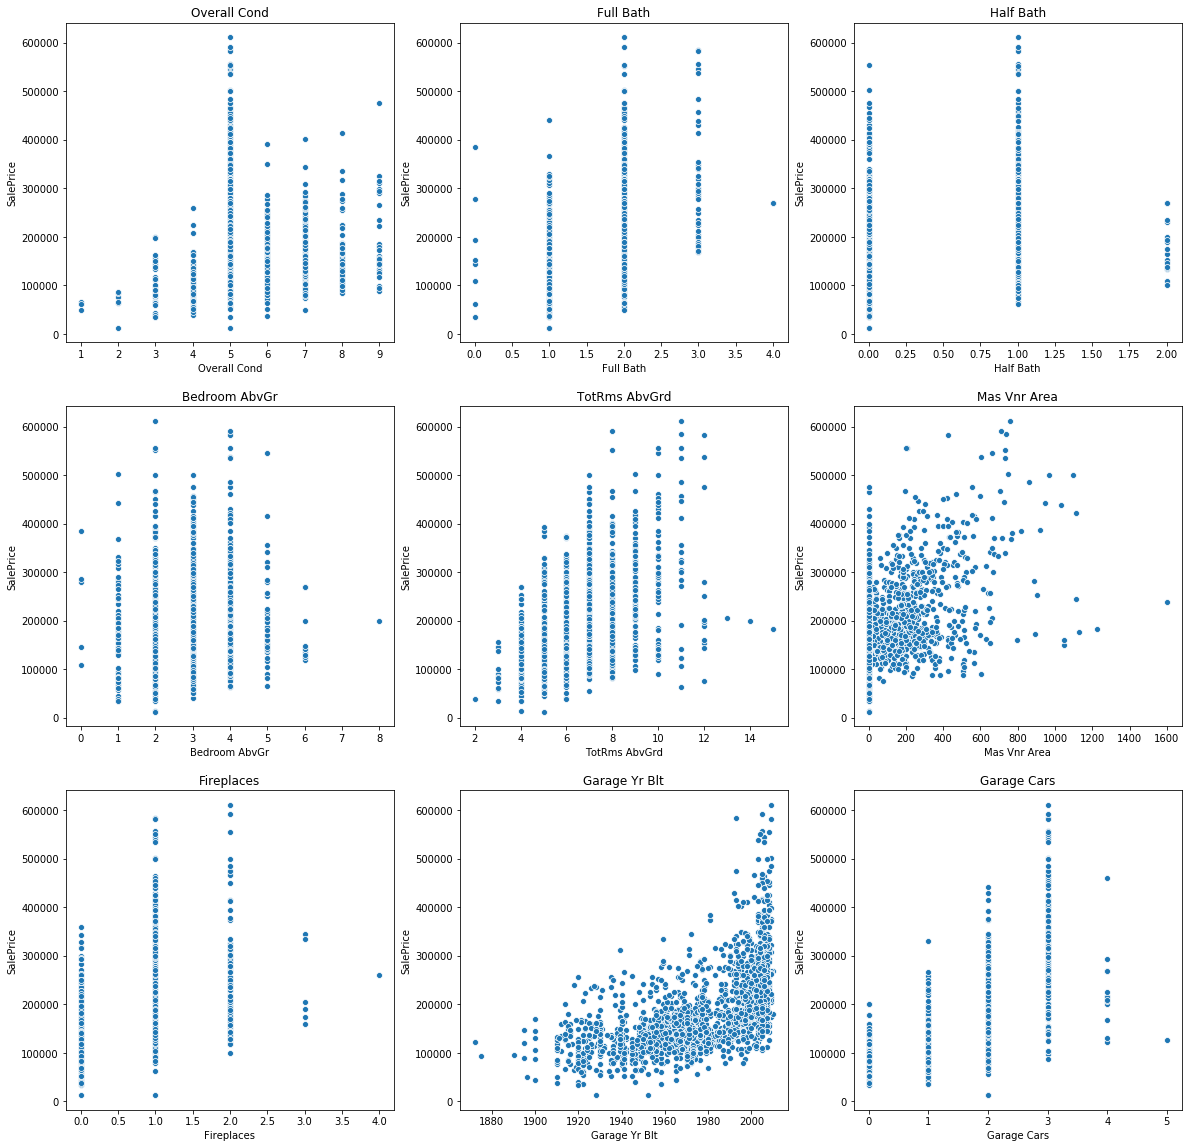

In [14]:
# create function that will return a list of items
# this particular example returns just a list of one element
def buckets(i):
    return cols2[i]

# load dataset and create figure
num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

# iterate through all axes and create a violin plot
for i in range(num_plots):
    df = starter[cols2]
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.scatterplot(x=cols2[i], y="SalePrice", data=df, ax=ax_curr)
    ax_curr.set_title(buckets(i))

Overall Cond and Full/Half bath also demonstrate some non-linear/counter intuitive trends

### Plotting the next nine numerical variables

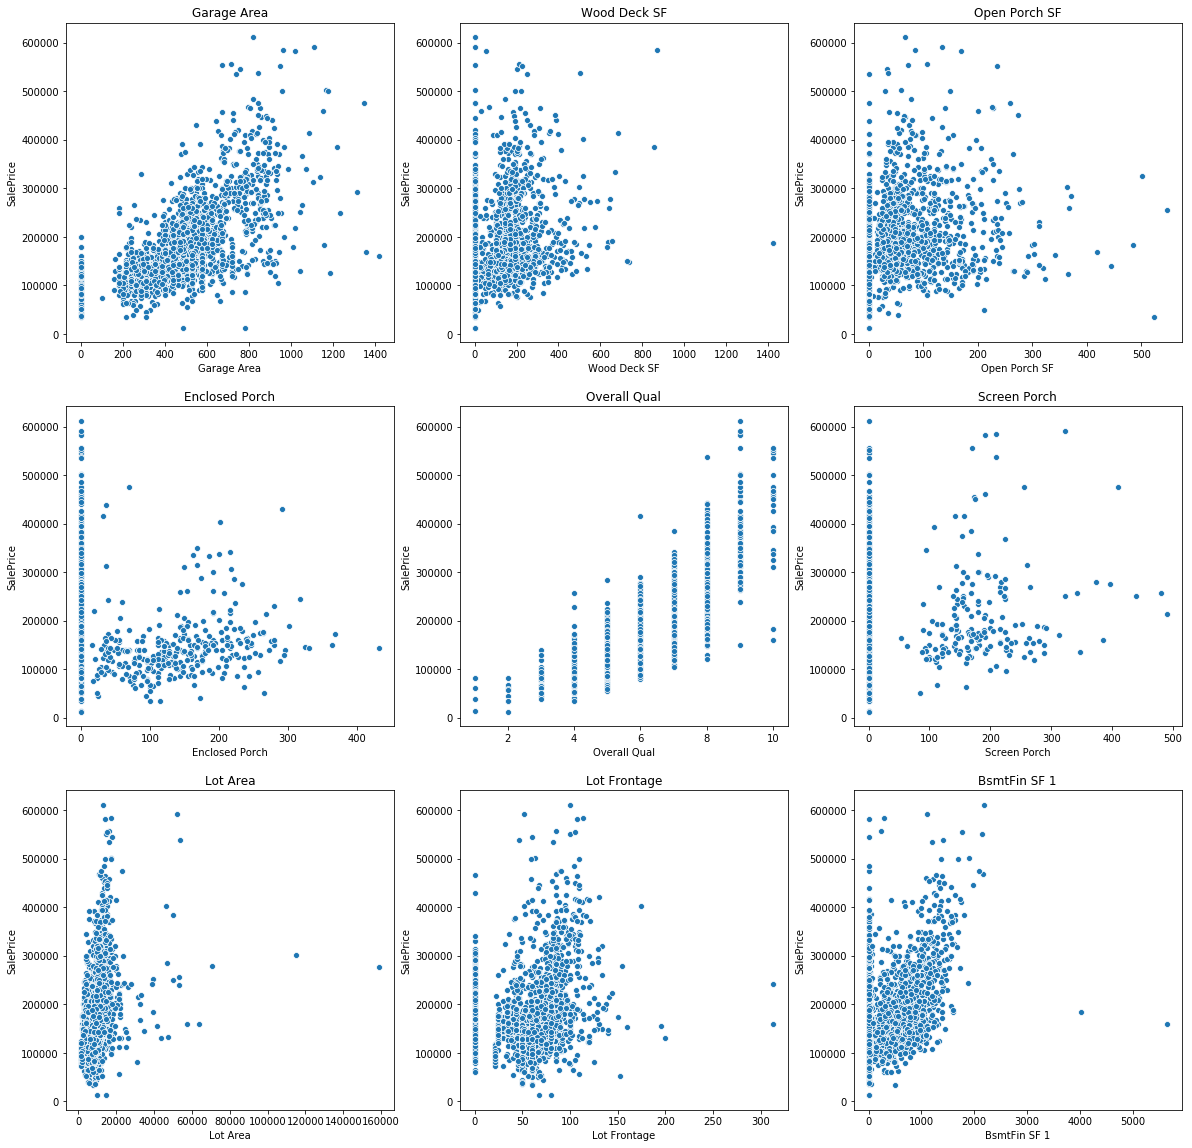

In [16]:
# create function that will return a list of items
# this particular example returns just a list of one element
def buckets(i):
    return cols3[i]

# load dataset and create figure
num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

# iterate through all axes and create a violin plot
for i in range(num_plots):
    df = starter[cols3]
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    sns.scatterplot(x=cols3[i], y="SalePrice", data=df, ax=ax_curr)
    ax_curr.set_title(buckets(i))

Overall Quality seems to have a very linear relationship with Sale Price. Lot Area, Lot Frontage and BsmtFin SF 1 look more exponential.

# Plotting the most important categorical variables

### Identify which categorical variables have the biggest difference in median Sale Price, from highest to lowest.

In [17]:
def median_diff(attribute):
    piv = pd.pivot_table(data=starter, columns=[attribute],
                    values=['SalePrice'], 
                    aggfunc=np.median).T.sort_values('SalePrice',ascending=False).reset_index()
    
    return (piv.iloc[0]['SalePrice'] - piv.iloc[-1]['SalePrice'])

In [18]:
categories = pd.DataFrame(categorical.columns)
categories = categories.set_index(0).reset_index()
categories.columns = ['Attribute']
categories['MedianDiff'] = categories.Attribute.apply(lambda x: median_diff(x))

In [19]:
categories.sort_values('MedianDiff',ascending=False).head()

,Attribute,MedianDiff
42,Overall Qual_obj,399850.0
10,Condition 2,295250.0
18,Exter Qual,287217.0
21,Bsmt Qual,230900.0
8,Neighborhood,230000.0


### Plot each categorical variable, by Sale Price

In [20]:
highest_median_categories = categories.sort_values('MedianDiff',ascending=False)['Attribute'][0:9].tolist()
highest_median_categories2 = categories.sort_values('MedianDiff',ascending=False)['Attribute'][9:18].tolist()
highest_median_categories.append('SalePrice')
highest_median_categories2.append('SalePrice')
highest_median_categories3 = categories.sort_values('MedianDiff',ascending=False)['Attribute'][18:27].tolist()
highest_median_categories3.append('SalePrice')

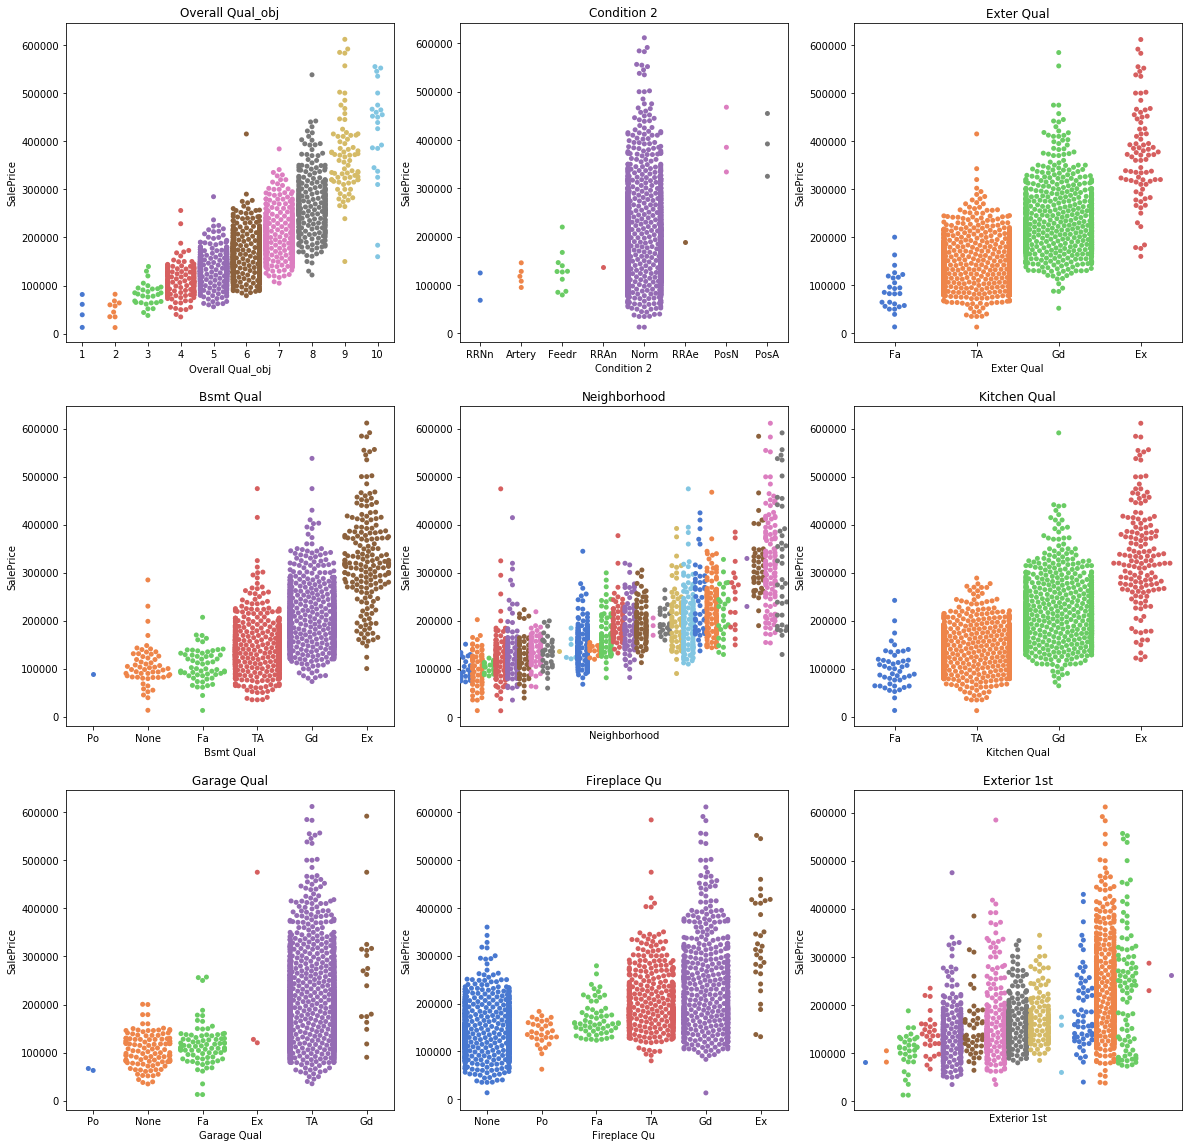

In [21]:
# create function that will return a list of items
# this particular example returns just a list of one element

def buckets(i):
    return highest_median_categories[i]

# load dataset and create figure
num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

# iterate through all axes and create a violin plot
for i in range(num_plots):
    df = starter[highest_median_categories]
    
    order = list(pd.pivot_table(data=df, columns=highest_median_categories[i],
                    values='SalePrice', 
                    aggfunc=np.median).T.sort_values(by='SalePrice').reset_index()[highest_median_categories[i]])
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    ax = sns.swarmplot(x=highest_median_categories[i], y="SalePrice", data=df, ax=ax_curr,order=order,palette='muted')
    
    if len(order) > 10:
        ax.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
   
    ax_curr.set_title(buckets(i))

Similar to the numerical plots, Overall Quality seems to have a strong positive relationship to Sale Price. Basement, Kitchen and Exterior Quality seem to, as well.

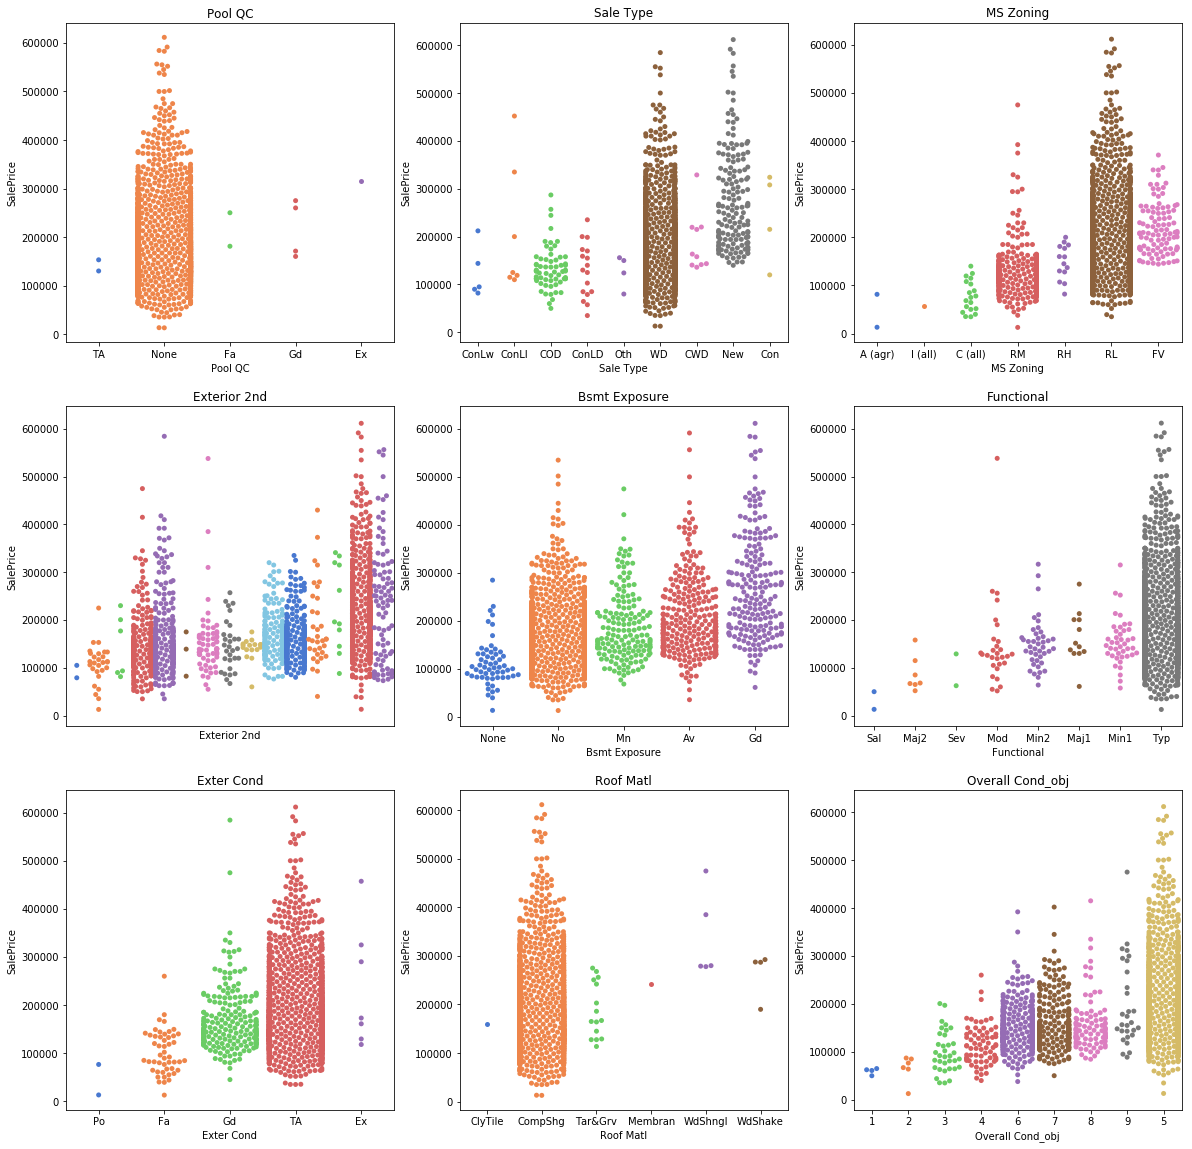

In [26]:
def buckets2(i):
    return highest_median_categories2[i]

num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

for i in range(num_plots):
    df = starter[highest_median_categories2]
    
    order = list(pd.pivot_table(data=df, columns=highest_median_categories2[i],
                    values='SalePrice', 
                    aggfunc=np.median).T.sort_values(by='SalePrice').reset_index()[highest_median_categories2[i]])
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    ax = sns.swarmplot(x=highest_median_categories2[i], y="SalePrice", data=df, ax=ax_curr,order=order,palette='muted')
    
    if len(order) > 10:
        ax.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
   
    ax_curr.set_title(buckets2(i))

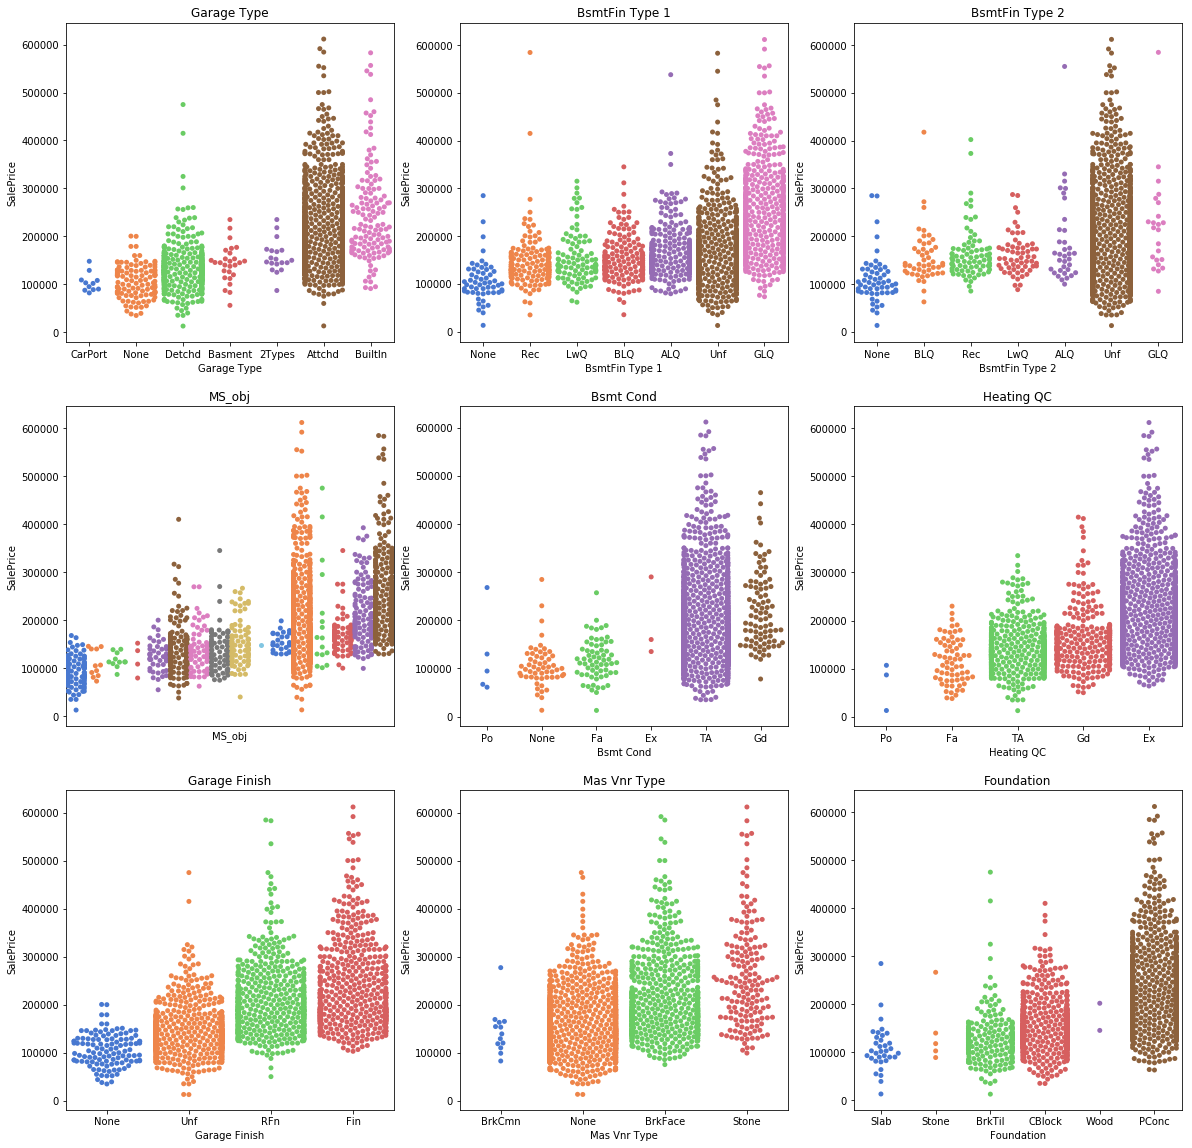

In [23]:
# iterate through all axes and create a violin plot
def buckets3(i):
    return highest_median_categories3[i]

num_plots = 9
fig, axes = plt.subplots(3,3,figsize=(20,20))

for i in range(num_plots):
    df = starter[highest_median_categories3]
    
    order = list(pd.pivot_table(data=df, columns=highest_median_categories3[i],
                    values='SalePrice', 
                    aggfunc=np.median).T.sort_values(by='SalePrice').reset_index()[highest_median_categories3[i]])
    row = i // 3
    col = i % 3
    ax_curr = axes[row, col]
    ax = sns.swarmplot(x=highest_median_categories3[i], y="SalePrice", data=df, ax=ax_curr,order=order,palette='muted')
    
    if len(order) > 10:
        ax.tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)
   
    ax_curr.set_title(buckets3(i))

Seems like attributes pertaining to Square Footage/Area and "Quality"/"Finish" designations have the strongest relationship to Sale Price.